# Analyze Orders , Rating , Fav Food trend out of Zomato Dataset 

1. Problem Statement

Do EDA on Zomato Dataset to find insights of Order, Rating givens by customers ,there food habits for better recommendation.

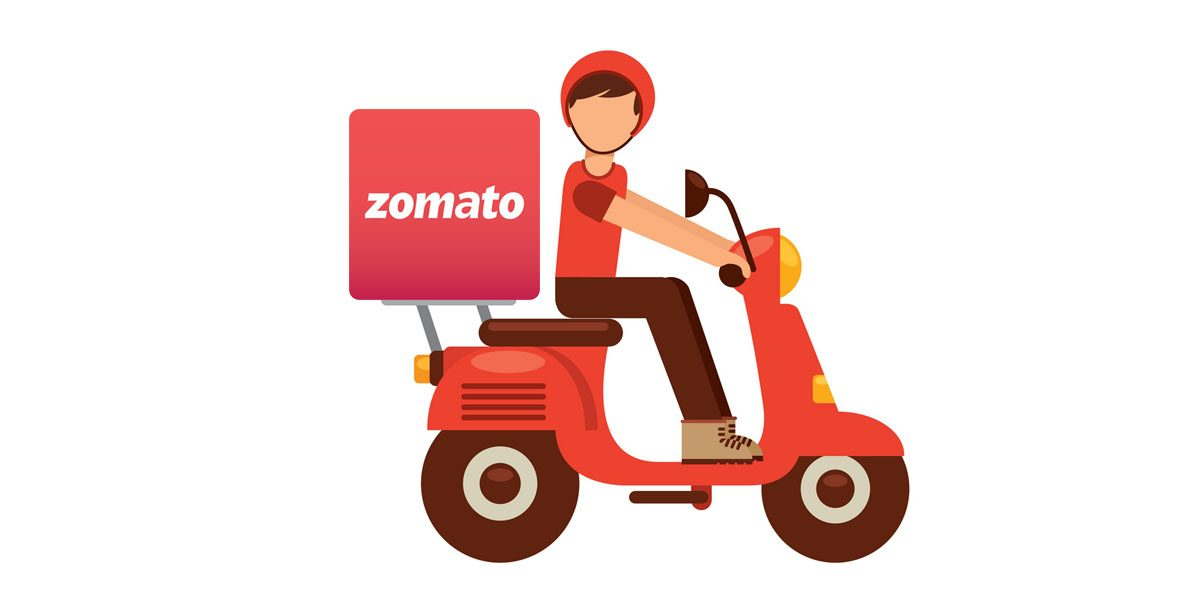

In [65]:
from IPython.display import Image
Image(filename='zomato.jpg')

Dataset - https://raw.githubusercontent.com/Amritrajdubey/DATASETS/main/zomato.csv

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading dataset from github ad df
df = pd.read_csv('https://raw.githubusercontent.com/Amritrajdubey/DATASETS/main/zomato.csv',encoding ='latin-1')

In [3]:
# Top 5 data
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.columns # Column of dataset

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
# Counting nof of data in each column
df.count()

Restaurant ID           9551
Restaurant Name         9551
Country Code            9551
City                    9551
Address                 9551
Locality                9551
Locality Verbose        9551
Longitude               9551
Latitude                9551
Cuisines                9542
Average Cost for two    9551
Currency                9551
Has Table booking       9551
Has Online delivery     9551
Is delivering now       9551
Switch to order menu    9551
Price range             9551
Aggregate rating        9551
Rating color            9551
Rating text             9551
Votes                   9551
dtype: int64

In [7]:
# Checking for null value in dataset
df.isnull().sum().sum()

9

In [8]:
# Datatype of deach column
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [9]:
# Description of dataset
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# Things to do in data analysis
1. Missing values 
3. Explore about Num and categorical variables
4. Finding relationship b/w features 

In [10]:
# Missing values finding
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [11]:
# Finding column having missing data
mis_col = [x for x in df.columns if df[x].isnull().sum() >0]
mis_col

['Cuisines']

In [12]:
# Shape of original dataset
df.shape

(9551, 21)

In [13]:
# Droping row with null value as null value is very less and will not affect our dataset
dff = df.dropna(subset=['Cuisines'])

In [14]:
# Checking shape of our new dataset which is changed
dff.shape

(9542, 21)

In [15]:
# Verifying for null value 
dff.isnull().sum().sum()

0

In [16]:
# Checking for null value in restaurant ID
dff['Restaurant ID'].isnull().sum()

0

# Country-Code Dataset is available on link-https://github.com/Amritrajdubey/DATASETS/blob/main/Country-Code.xlsx    

In [17]:
# Dataset with country code for Zomato dataset
df1 = pd.read_excel('Country-Code.xlsx') 

In [18]:
# Top records of dataset
df1.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [19]:
df1.columns

Index(['Country Code', 'Country'], dtype='object')

In [20]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [21]:
# Merging both the datasets
Df=pd.merge(df,df1,on ='Country Code',how='left')

In [22]:
# Top 5 row of Merged dataset
Df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [23]:
# Code to seprate numerical and categorical columns
num_col = [x for x in Df.columns if Df[x].dtypes != 'O']
cat_col = [x for x in Df.columns if Df[x].dtypes == 'O']

In [24]:
# Numerical columns in dataset
num_col

['Restaurant ID',
 'Country Code',
 'Longitude',
 'Latitude',
 'Average Cost for two',
 'Price range',
 'Aggregate rating',
 'Votes']

In [25]:
# Categorical column in dataset
cat_col

['Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Rating color',
 'Rating text',
 'Country']

In [82]:
# Unique Entry values of each country
Country_val = Df.Country.value_counts().values

In [28]:
# Unique country names where out of dataset
country_names = Df.Country.value_counts().index

In [33]:
print(f"{country_names} ':' {Country_val}")

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object') ':' [8652  434   80   60   60   60   40   34   24   22   21   20   20   20
    4]


([<matplotlib.patches.Wedge at 0x1839e814c70>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

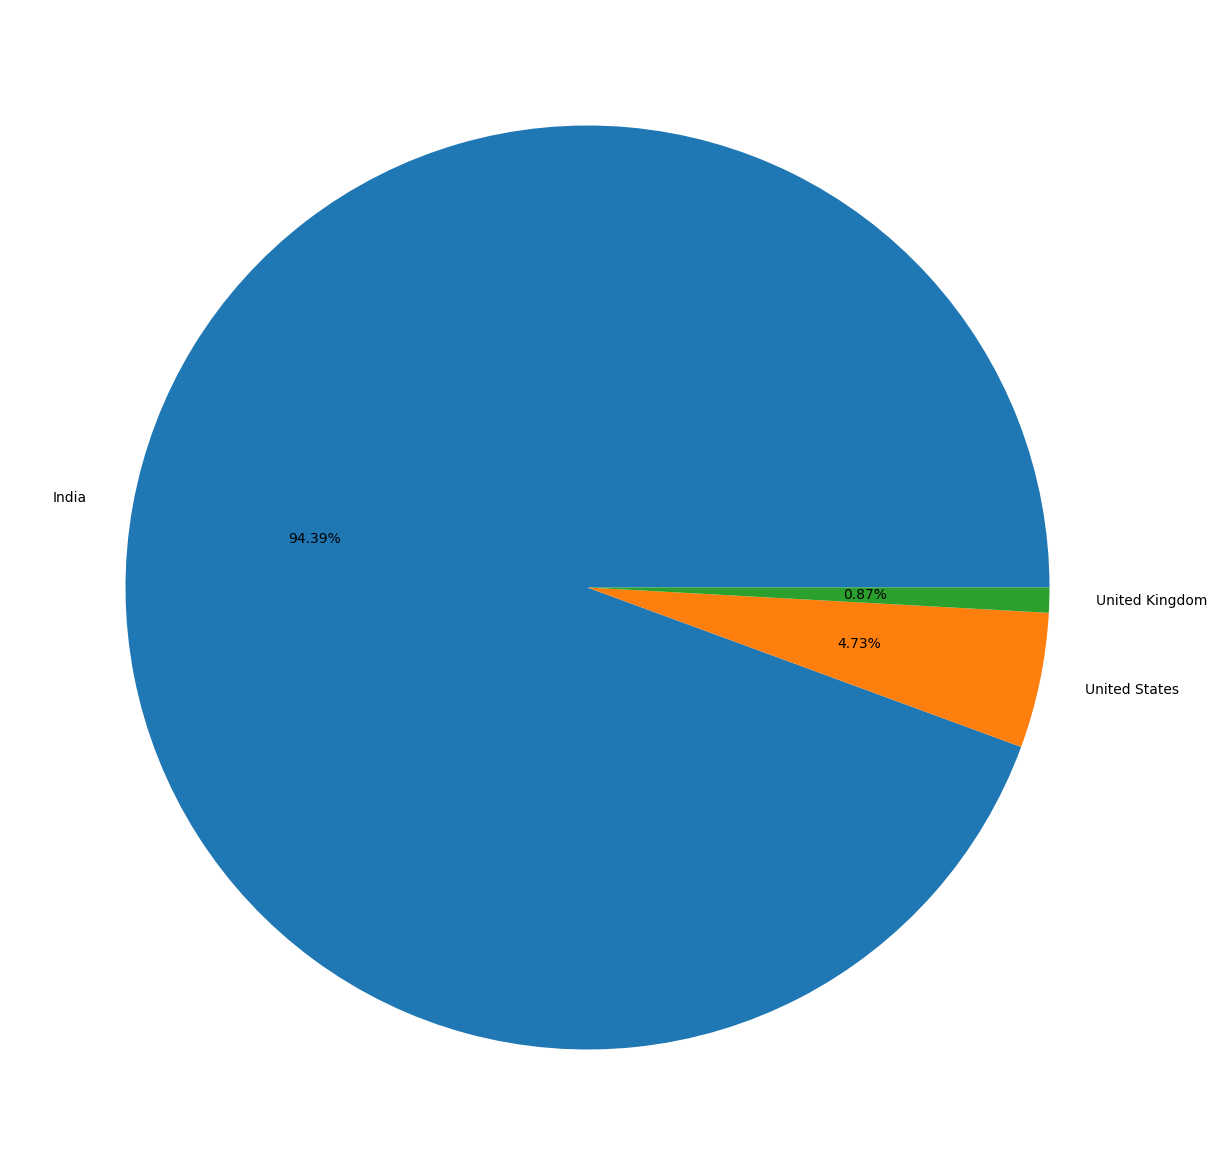

In [93]:
#pie chart displaying top 3 country presence for Zomato 
plt.figure(figsize=(15,15))
plt.pie(Country_val[:3],labels=country_names[:3],autopct="%.2f%%")

Observation : Zomato max bussiness is from India followed by USA and UK

In [36]:
Df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [37]:
# Counting Rating from 0 - 5 with there Rating color
Df.groupby(['Aggregate rating','Rating color','Rating text']).size().count

<bound method Series.count of Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average   

In [46]:
# Defing variable with setting Index and column name for Rating count
Ratings=Df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns ={0:'Rating count'})

In [47]:
Ratings.count()

Aggregate rating    33
Rating color        33
Rating text         33
Rating count        33
dtype: int64

In [48]:
Ratings

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [34]:
# Observation
#1) Rating b/w 0 to 2.4 food is poor , 2.5 to 3.4 food is Average , 3.5 to 3.9 food is Good ,
#  4 to 4.4 food is Very good and above 4.5 till 4.9 it's excellent .
#2) Large chunk of people has not given any rating .


<AxesSubplot: xlabel='Aggregate rating', ylabel='Rating count'>

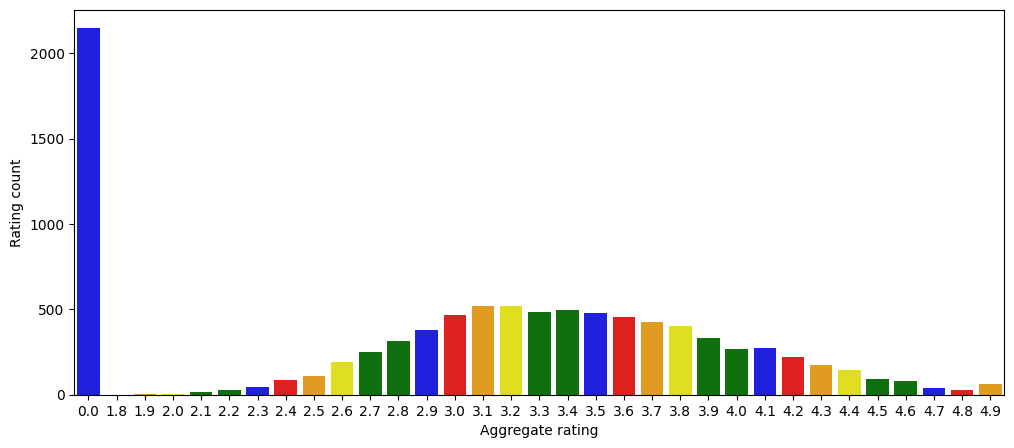

In [35]:
# Checking pattern of rating on graph
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,5)
sns.barplot(x='Aggregate rating',y='Rating count',data=Ratings,palette =['Blue','red','orange','yellow','green','green'])

In [36]:
# Observation
#1) Most People has given rating b/w 2.9 to 3.6
#2) Most number of rating is 0 or people has given no rating

In [50]:
# Checking for nos of unique rating in each color group.
Ratings.groupby(['Rating color']).size()

Rating color
Dark Green     5
Green          5
Orange        10
Red            7
White          1
Yellow         5
dtype: int64

<AxesSubplot: xlabel='Rating color', ylabel='count'>

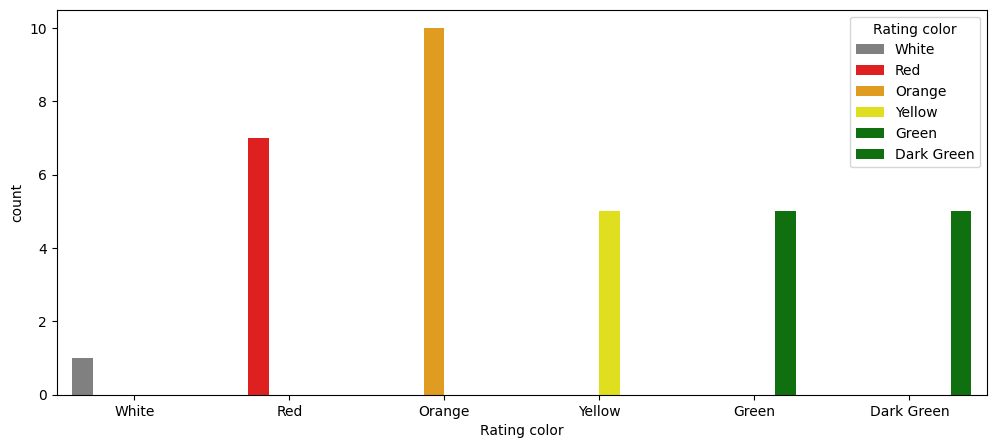

In [38]:
# Plotting graph to see nos of unique ratings count in specific range having unique color.
sns.countplot(x='Rating color',hue = 'Rating color',data=Ratings,palette =['Grey','red','orange','yellow','green','green'])

In [41]:
# Countries in the dataset
Df['Country']

0       Phillipines
1       Phillipines
2       Phillipines
3       Phillipines
4       Phillipines
           ...     
9546         Turkey
9547         Turkey
9548         Turkey
9549         Turkey
9550         Turkey
Name: Country, Length: 9551, dtype: object

In [42]:
# Unique countries
Df.Country.value_counts().index

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [43]:
# Countries where customers has given zero rating count
Df[Df['Aggregate rating']== 0].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


Insight:

* Most of Zero rating is given by Indian people

In [54]:
Df_Country= Df.groupby(['Country','Aggregate rating','Rating color']).size().reset_index().rename(columns ={0:'Rating count'})

In [56]:
Df_Country.groupby(['Rating color']).size()

Rating color
Dark Green    52
Green         62
Orange        40
Red           13
White          4
Yellow        51
dtype: int64

In [53]:
Df.groupby(['Aggregate rating','Country']).size().reset_index().head(4)

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3


In [52]:
# Checking currencies involved for payment mode
Df.groupby(['Currency','Country']).size().reset_index().head(15)

,Currency,Country,0
0,Botswana Pula(P),Phillipines,22
1,Brazilian Real(R$),Brazil,60
2,Dollar($),Australia,24
3,Dollar($),Canada,4
4,Dollar($),Singapore,20
5,Dollar($),United States,434
6,Emirati Diram(AED),UAE,60
7,Indian Rupees(Rs.),India,8652
8,Indonesian Rupiah(IDR),Indonesia,21
9,NewZealand($),New Zealand,40


In [53]:
# Checking for country with online delivery availability
Df.groupby(['Has Online delivery','Country']).size().reset_index().head(20)

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


In [57]:
# Country with online delivery availability
Df[Df['Has Online delivery'] == 'Yes'].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [58]:
Df[Df['Has Online delivery'] == 'Yes'].groupby('Country').count()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
Country,,,,,,,,,,,,,,,,,,,,,
India,2423,2423,2423,2423,2423,2423,2423,2423,2423,2423,...,2423,2423,2423,2423,2423,2423,2423,2423,2423,2423
UAE,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28


In [59]:
# Seprating city names from Df
City_name=Df.City.value_counts().index

In [60]:
# Count of value of cities
City_val=Df.City.value_counts().values

([<matplotlib.patches.Wedge at 0x1839f9d4fd0>,
 [Text(-0.6093229902525419, 0.9158195747797166, 'New Delhi'),
  Text(0.04855897468526975, -1.0989276709490554, 'Gurgaon'),
  Text(0.8689790405567204, -0.6744445322434767, 'Noida'),
  Text(1.08995637491287, -0.14830745357801672, 'Faridabad'),
  Text(1.099616212633222, -0.029054860422456693, 'Ghaziabad'),
  Text(1.0999622942144016, -0.00910776078903895, 'Bhubaneshwar')],
 [Text(-0.3323579946832046, 0.4995379498798454, '68.69%'),
  Text(0.02648671346469259, -0.5994150932449392, '14.03%'),
  Text(0.47398856757639285, -0.367878835769169, '13.55%'),
  Text(0.5945216590433835, -0.0808949746789182, '3.15%'),
  Text(0.5997906614363029, -0.015848105684976375, '0.31%'),
  Text(0.5999794332078554, -0.004967869521293972, '0.26%')])

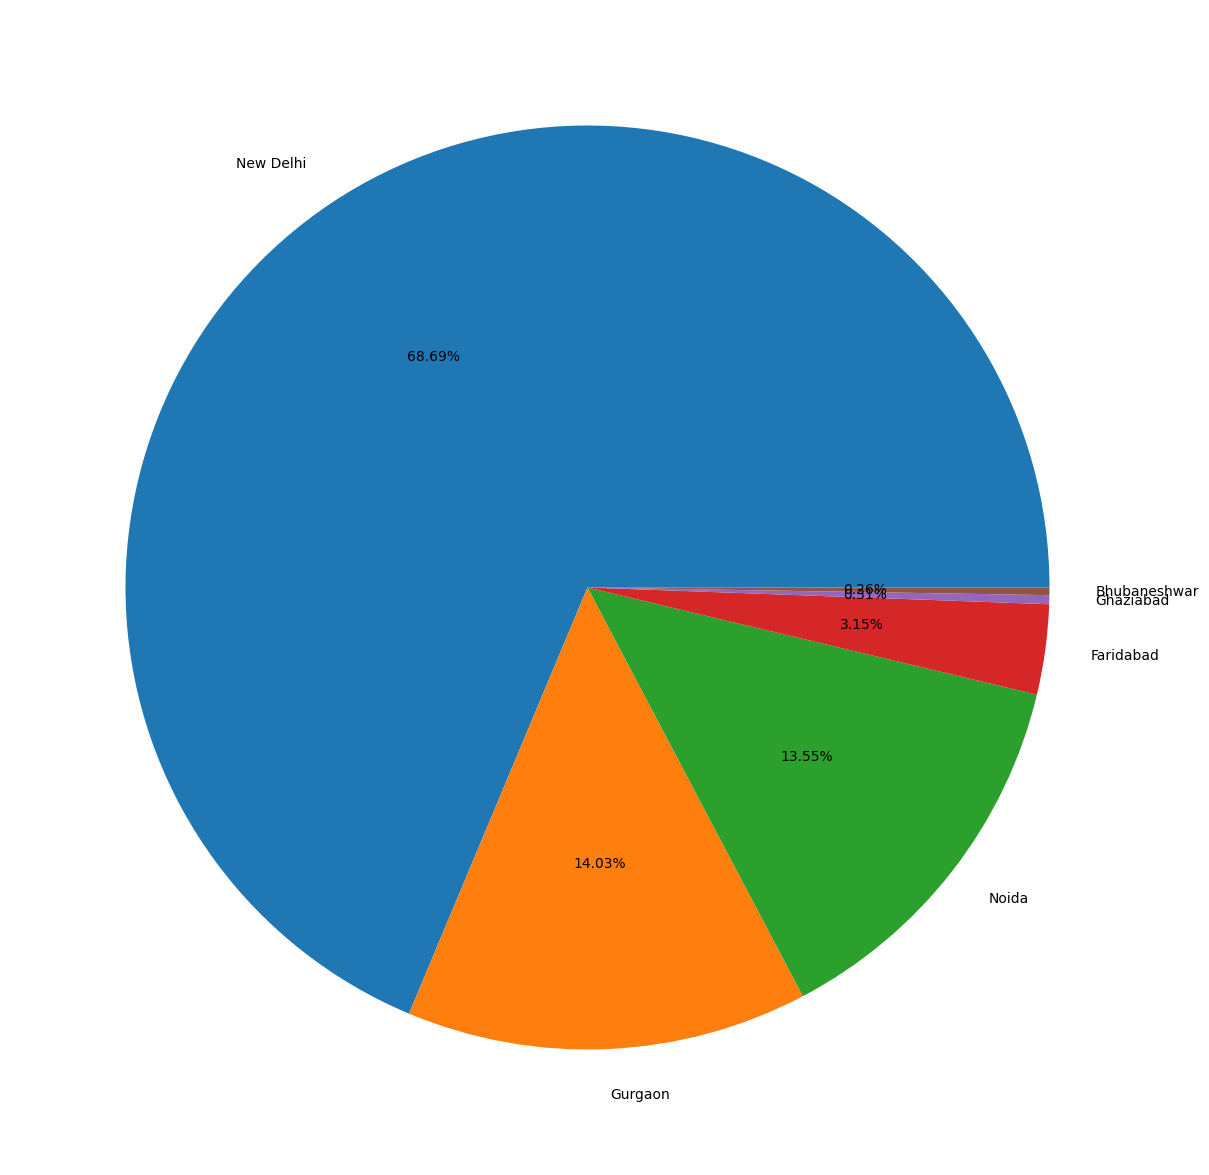

In [97]:
# Plotting pie chart having top 6 cities 
plt.figure(figsize=(15,15))
plt.pie(City_val[:6],labels=City_name[:6],autopct="%.2f%%")

In [67]:
Df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [71]:
# Creating seperate dataframe to find out famous cuisines
Df_cuisines =Df.groupby(['Cuisines','Country','Price range']).size().reset_index().rename(columns = {0:'Cuisines count'})

In [91]:
Df_cuisines.head()

,Cuisines,Country,Price range,Cuisines count
0,Afghani,India,1,1
1,Afghani,India,2,3
2,"Afghani, Mughlai, Chinese",India,2,1
3,"Afghani, North Indian",India,2,1
4,"Afghani, North Indian, Pakistani, Arabian",India,2,1


In [88]:
# Finding unique counts for each cuisines
Cuisines_count = Df_cuisines.Cuisines.value_counts().values

In [89]:
# Indiex value (Cuisines name) of top cuisines
Cuisines_name= Df_cuisines.Cuisines.value_counts().index

([<matplotlib.patches.Wedge at 0x1839e783f40>,
 [Text(0.9947928752251085, 0.46945408231408725, 'Cafe'),
  Text(0.32836628218627856, 1.0498455051688136, 'Italian'),
  Text(-0.44186498201010443, 1.0073506527883973, 'American'),
  Text(-0.9526279484541088, 0.5499999925673781, 'Chinese'),
  Text(-1.0962429433144842, -0.0908372678651042, 'Indian'),
  Text(-0.8491083369707444, -0.6992960975772545, 'Italian, Pizza'),
  Text(-0.3283663313330936, -1.0498454897968774, 'Mexican'),
  Text(0.2700340003861216, -1.0663403015151722, 'Asian'),
  Text(0.7884607421221013, -0.7670265041915212, 'Thai'),
  Text(1.0663402825533637, -0.2700340752646098, 'Pizza')],
 [Text(0.5426142955773319, 0.2560658630804112, '14.04%'),
  Text(0.17910888119251556, 0.5726430028193529, '12.28%'),
  Text(-0.2410172629146024, 0.5494639924300349, '10.53%'),
  Text(-0.519615244611332, 0.2999999959458426, '9.65%'),
  Text(-0.597950696353355, -0.049547600653693194, '9.65%'),
  Text(-0.4631500019840423, -0.3814342350421388, '9.65%'),

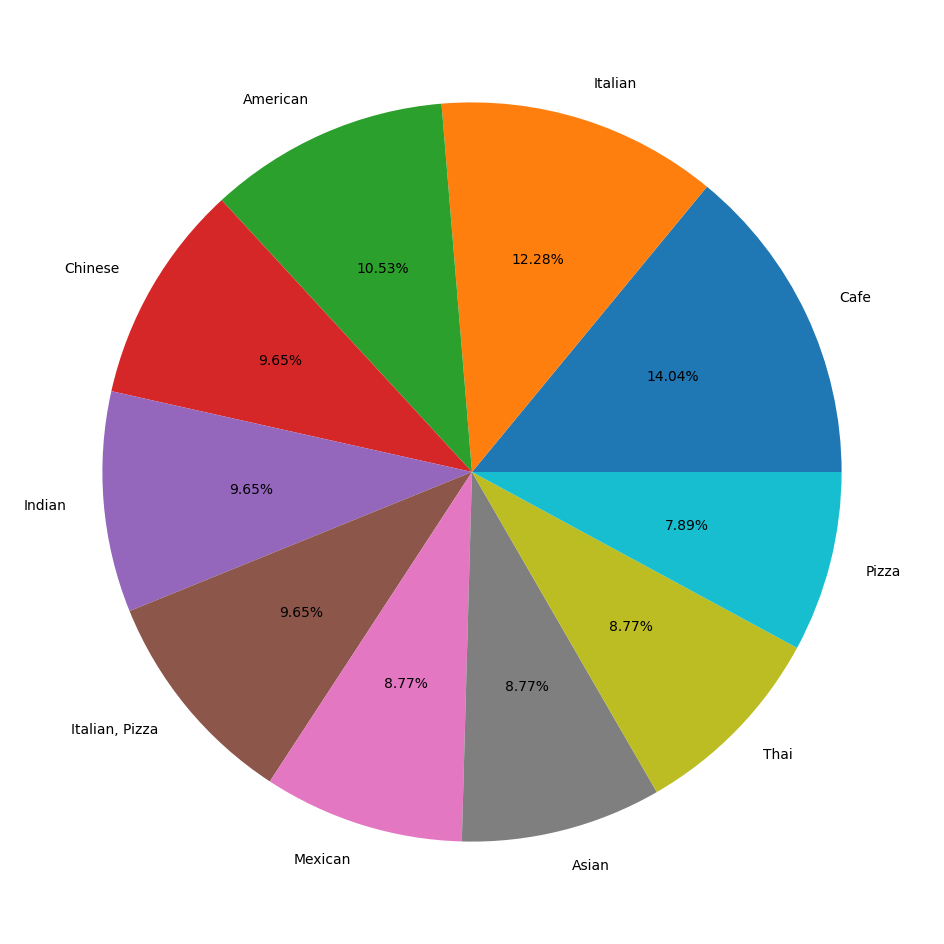

In [95]:
# Plotting pie chart to figure out famous cuisines
plt.figure(figsize=(12,12))
plt.pie(Cuisines_count[:10],labels=Cuisines_name[:10],autopct="%.2f%%")

Insights:
    
    * Thus most famous food ordered on Zomato is There own cafe speciality , Itailian , followed by American and further